In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from astropy.io import fits
from matplotlib import colors
from scipy.ndimage import zoom, shift

In [2]:
alma_fits = fits.open('member.uid___A001_X340_X1d5._RXJ1842.9-3532__sci.spw17_19_21_23.cont.I.pbcor.fits')
alma_hdu = alma_fits[0]
alma_data = alma_hdu.data
alma_image = alma_data[0, 0, :, :]

wray_fits = fits.open('WRAY_15-1880_SPHERE_2021-05-16_H.fits')
wray_hdu = wray_fits[0]
wray_data = wray_hdu.data
wray_qphi = wray_data[1, :, :]

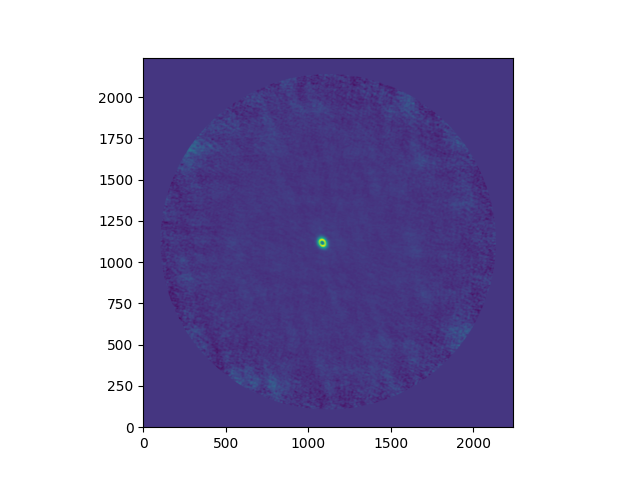

(2240, 2240)

In [3]:
alma_image = np.nan_to_num(alma_image)
wray_qphi = np.nan_to_num(wray_qphi)

# Step 1: Upsample alma_image to 12.5 mas/px
alma_upsampled = zoom(alma_image, 28/12.5, order=3)

plt.figure()
plt.imshow(alma_upsampled, origin='lower')
plt.show()

np.shape(alma_upsampled)

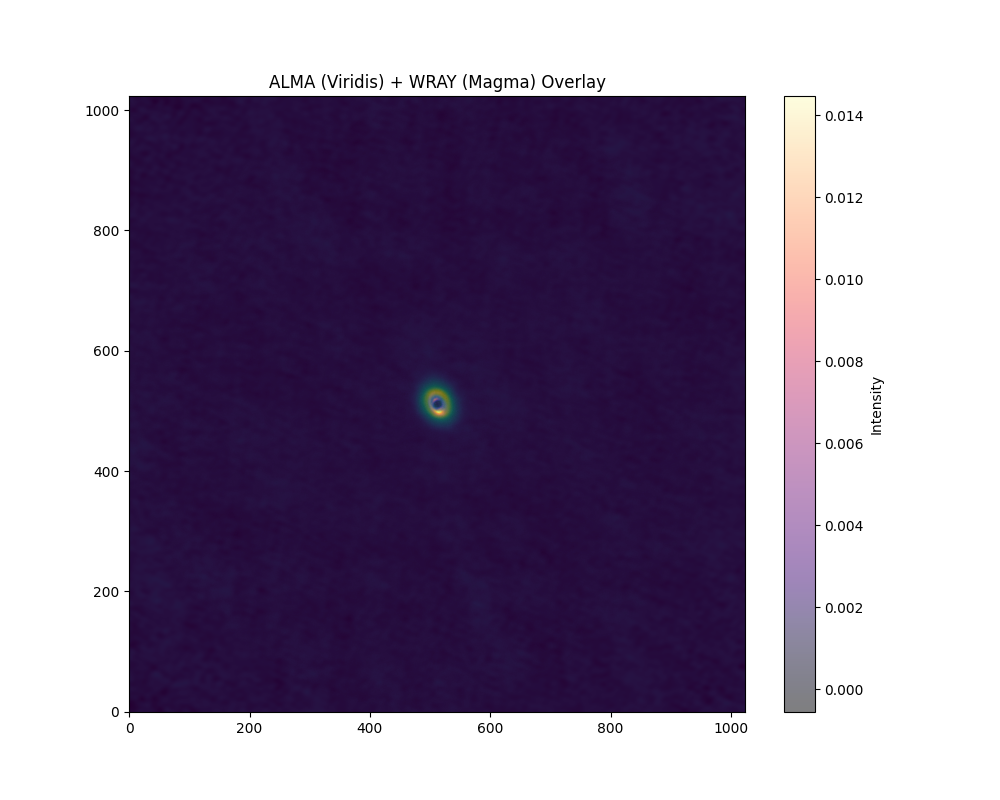

(1024, 1024)

In [4]:
# Step 2: Shift alma to match wray's center
alma_aligned = shift(
    alma_upsampled,
    shift=(512 - 1114, 512 - 1086),
    order=3,
    mode='constant',
    cval=0
)

# Step 3: Crop to overlap
min_shape = np.minimum(alma_aligned.shape, wray_qphi.shape)
alma_aligned = alma_aligned[:min_shape[0], :min_shape[1]]
wray_aligned = wray_qphi[:min_shape[0], :min_shape[1]]

# Step 4: Superpose
superposed = (alma_aligned*5 + wray_aligned) #/ 2

# Step 5: Plot results

plt.figure(figsize=(10, 8))
plt.imshow(alma_aligned, origin='lower', cmap='viridis', alpha=1)
plt.imshow(wray_aligned, origin='lower', cmap='magma', alpha=0.5)
plt.colorbar(label='Intensity')
plt.title('ALMA (Viridis) + WRAY (Magma) Overlay')
plt.show()

np.shape(superposed)